# Linear Regression

## Simple linear regression

### Dataset description and visualisation

<b>Student Hours & Scores: </b> In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

<div class="alert alert-block alert-danger"> 

1. Import the student hours and scores dataset.
2. Is this task a multiple or a simple linear regression problem?
3. Which variable represents the dependent variable, and which one represents the independent variable?
4. Display the number of samples and features in the dataset.
5. Display the information about the dataset features.
6. Describe the features by displaying their statistics.
7. Plot the data and observe whether it demonstrates linear separability.
<div/>

### Dataset training and evaluation

<div class="alert alert-block alert-danger">  
    
1. Split the dataset into training and testing sets.
2. Train the data using the LinearRegression module from sklearn. 
3. Display the model's equation.
4. Create a plot showing the data and the generated model.
5. Display the performance of the generated model on the training and the test set, based on the following metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared. Does the generated model present an overfitting problem?
6. Describe the R-squared metric and its advantages compared to the other metrics.
7. Is the generated model characterized by good performance?
8. Create a plot visualizing the difference between actual and predicted values.
<div/>

Model equation: y = [[9.65063802]] * x + [2.42825248]
Mean absolute error: 5.36
Mean Squared Error (MSE): 32.59
Root Mean Squared Error (RMSE): 5.71
R2-score: 0.95


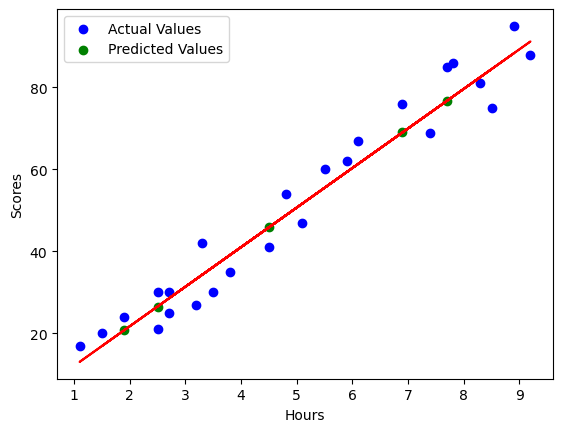

In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

df = pd.read_csv("student_scores.csv")

msk = np.random.rand(len(df)) < 0.8

train = df[msk]
test = df[~msk]

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Hours']])
train_y = np.asanyarray(train[['Scores']])

regr.fit(train_x, train_y)


print(f"Model equation: y = {regr.coef_} * x + {regr.intercept_}")

plt.scatter(train.Hours, train.Scores,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Hours")
plt.ylabel("Scores")



test_x = np.asanyarray(test[['Hours']])
test_y = np.asanyarray(test[['Scores']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean Squared Error (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("Root Mean Squared Error (RMSE): %.2f" % np.sqrt(np.mean((test_y_ - test_y) ** 2)))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )



plt.scatter(test_x, test_y, color='blue', label="Actual Values")
plt.scatter(test_x, test_y_, color='green', label="Predicted Values")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.legend()
plt.show()
